# Note
1. Melakukan percobaan build_models v3.9 dengan Clasifikasi 07 Class
2. Dilakukan pada hari Kamis, 15 Juni 2024 jam 02.00 WIB
3. Tempat di Kost

## Clasifikasi disetiap Class
1. Class 1, meliputi:
   Ha, Ta, Ya, La

2. Class 2, meliputi:
   Ba, Nya, Nga

3. Class 3, meliputi:
   Na, Da, Ka

4. Class 4, meliputi:
   Ca, Sa

5. Class 5, meliputi:
   Wa, Pa, Dha

6. Class 6, meliputi:
   Ra, Ga

7. Class 7, meliputi:
   Ja, Ma     

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [2]:
import pandas as pd

path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\"
file = path_main + "augmented_labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,label
0,../data/data_preprocessing/v2.3/class 1\ha_ori...,class 1
1,../data/data_preprocessing/v2.3/class 1\ha_ori...,class 1
2,../data/data_preprocessing/v2.3/class 1\ha_ori...,class 1
3,../data/data_preprocessing/v2.3/class 1\ha_ori...,class 1
4,../data/data_preprocessing/v2.3/class 1\ha_ori...,class 1


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 1 is  990
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 2 is  992
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 3 is  990
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 4 is  988
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 5 is  990
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 6 is  986
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.3\class 7 is  988


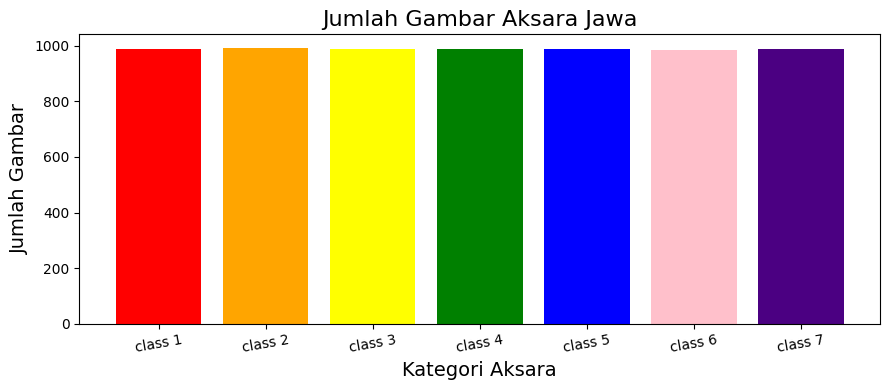

In [3]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)

countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 1")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 2")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 3")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 4")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 5")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 6")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.3\\class 7")

# Define the input path aksara
aksara_categories = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
# import os
# import cv2
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt

# # Define the input path and aksaraJowo
# INPUT_PATH = path_main  # Ganti dengan path ke data Anda
# AKSARA = aksara_categories
# BATCH_SIZE = 32
# IMAGE_SIZE = (128, 128)
# INPUT_SHAPE = (128, 128, 1)

# def create_image_generator(input_path, aksaraJowo, image_size):
#     for index, jowo in enumerate(aksaraJowo):
#         aksara_path = os.path.join(input_path, jowo)
        
#         for filename in os.listdir(aksara_path):
#             image_path = os.path.join(aksara_path, filename)
#             image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
#             original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Simpan gambar asli
#             grayscale_image = image.copy()  # Simpan gambar grayscale
#             image = cv2.resize(image, image_size)  # Resize image
#             # Normalisasi tidak diperlukan karena gambar sudah dalam skala 0-255
#             image_filtered = apply_log_and_threshold(image)
            
#             yield original_image, grayscale_image, image_filtered, index

# def load_images_in_batches(input_path, aksaraJowo, image_size, batch_size=BATCH_SIZE):
#     X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
#     image_generator = create_image_generator(input_path, aksaraJowo, image_size)
    
#     for original_image, grayscale_image, image_filtered, label in image_generator:
#         X_original.append(original_image)
#         X_grayscale.append(grayscale_image)
#         X_filtered.append(image_filtered)
#         y_label.append(label)
        
#         if len(X_original) == batch_size:
#             yield (np.array(X_original), np.array(X_grayscale), np.array(X_filtered), to_categorical(np.array(y_label)))
#             X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
#     if len(X_original) > 0:
#         yield (np.array(X_original), np.array(X_grayscale), np.array(X_filtered), to_categorical(np.array(y_label)))

# def apply_log_and_threshold(image, kernel_size=7, sigma=1, log_threshold=0):
#     # Apply Gaussian Blur
#     image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
#     # Apply Laplacian of Gaussian (LoG)
#     edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F)
    
#     # Thresholding for Edge Detection Results
#     detected_edges_log = np.zeros_like(edges_log)
#     detected_edges_log[edges_log > log_threshold] = 255
    
#     return detected_edges_log

# # Load images with LoG filter and thresholding applied in batches
# image_batches = load_images_in_batches(INPUT_PATH, AKSARA, IMAGE_SIZE, batch_size=BATCH_SIZE)

# # Process the first batch
# X_original_batch, X_grayscale_batch, X_filtered_batch, y_label_batch = next(image_batches)

# # Select one image to display
# index_to_display = 0

# # Display the original image, grayscale image, and filtered image
# original_image = X_original_batch[index_to_display]
# grayscale_image = X_grayscale_batch[index_to_display]
# filtered_image = X_filtered_batch[index_to_display]

# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan yang benar

# plt.subplot(1, 3, 2)
# plt.title('Grayscale Image')
# plt.imshow(grayscale_image)

# plt.subplot(1, 3, 3)
# plt.title('Filtered Image (LoG)')
# # plt.imshow(filtered_image, cmap='gray')
# plt.imshow(filtered_image, cmap='gray')

# plt.show()

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  # Ganti dengan path ke data Anda
AKSARA = aksara_categories
BATCH_SIZE = 62
# Define the target image size
IMAGE_SIZE = (128, 128)
INPUT_SHAPE = (128, 128, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Simpan gambar asli
            grayscale_image = image.copy()  # Simpan gambar grayscale
            image = cv2.resize(image, image_size)  # Resize image
            # Normalisasi tidak diperlukan karena gambar sudah dalam skala 0-255
            image_filtered = apply_log_and_threshold(image)
            
            yield original_image, grayscale_image, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_log_and_threshold(image, kernel_size=7, sigma=0, log_threshold=1):
    # Apply Gaussian Blur
    image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Apply Laplacian of Gaussian (LoG)
    edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F)
    
    # Thresholding for Edge Detection Results
    detected_edges_log = np.zeros_like(edges_log)
    detected_edges_log[edges_log > log_threshold] = 255
    
    return detected_edges_log

# Load images with LoG filter and thresholding applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

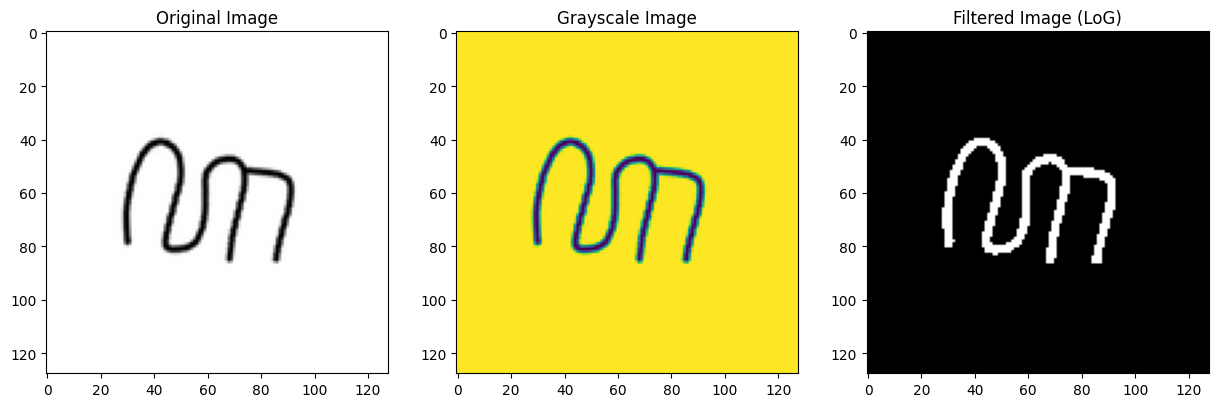

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan yang benar

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)

plt.subplot(1, 3, 3)
plt.title('Filtered Image (LoG)')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')

plt.show()

In [6]:
print(f"Bentuk input pada gambar: {IMAGE_SIZE}")


Bentuk input pada gambar: (128, 128)


In [7]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 128, 128, 1)
print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (6924, 128, 128, 1)


In [8]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.3, random_state=45)

In [9]:
print("x_train shape", X_train.shape)
print("x_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (4846, 128, 128, 1)
x_test shape (2078, 128, 128, 1)
y_train shape (4846, 7)
y_test shape (2078, 7)


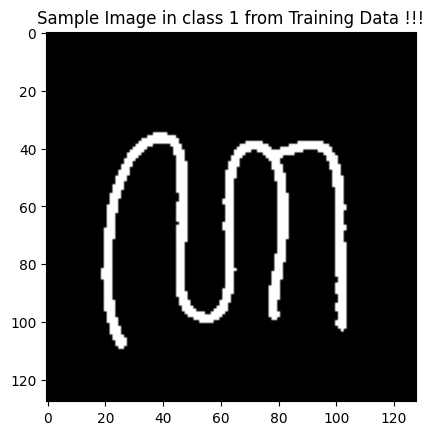

In [10]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[99], cmap='gray')
plt.title("Sample Image in {} from Training Data !!!".format(AKSARA[np.argmax(y_train[99])]))
plt.axis('on')
plt.show()

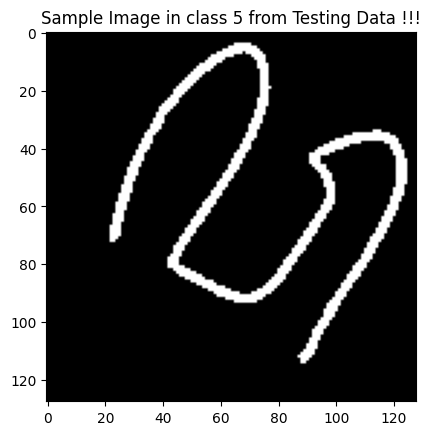

In [11]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[87], cmap='gray')
plt.title("Sample Image in {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[87])]))
plt.axis('on')
plt.show()

# Build the Model

In [15]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [13]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

# Block 2
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Block 3
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Block 4
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(Dropout(0.5))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(axis=1, momentum=0.1, epsilon=0.1))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(7, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128, 128, 64)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128, 128, 64)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 42, 42, 128)    │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 42, 42, 128)    │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 21, 21, 256)    │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 21, 21, 256)    │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 21, 21, 256)    │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,275,207 (58.27 MB)

 Trainable params: 15,273,543 (58.26 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [14]:
history_v1 = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1992s 25s/step - accuracy: 0.1419 - loss: 3.0629 - val_accuracy: 0.1718 - val_loss: 3.4038
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1937s 25s/step - accuracy: 0.1431 - loss: 2.9879 - val_accuracy: 0.1655 - val_loss: 3.2916
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1948s 25s/step - accuracy: 0.1636 - loss: 2.8601 - val_accuracy: 0.1468 - val_loss: 2.4446
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1957s 25s/step - accuracy: 0.1693 - loss: 2.8578 - val_accuracy: 0.1405 - val_loss: 2.6137
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1973s 25s/step - accuracy: 0.1762 - loss: 2.8437 - val_accuracy: 0.1078 - val_loss: 2.2738
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1971s 25s/step - accuracy: 0.1830 - loss: 2.7405 - val_accuracy: 0.1978 - val_loss: 2.4057
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1937s 25s/step - accuracy: 0.1934 - loss: 2.7027 - val_accuracy: 0.1646 - val_loss: 2.2863
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1946s 25s/step - accuracy: 0.1941 - loss: 2.6170 - val_accu

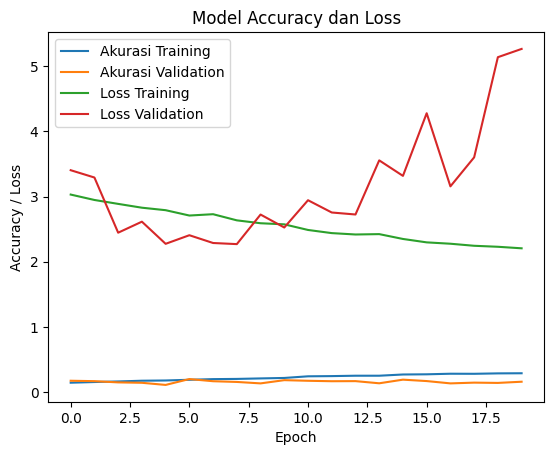

In [20]:
import matplotlib.pyplot as plt

# Plot akurasi training dan validation
plt.plot(history_v1.history["accuracy"], label="Akurasi Training")
plt.plot(history_v1.history["val_accuracy"], label="Akurasi Validation")

# Plot loss training dan validation
plt.plot(history_v1.history["loss"], label="Loss Training")
plt.plot(history_v1.history["val_loss"], label="Loss Validation")

# Label dan judul plot
plt.title("Model Accuracy dan Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.legend()

# Tampilkan plot
plt.show()

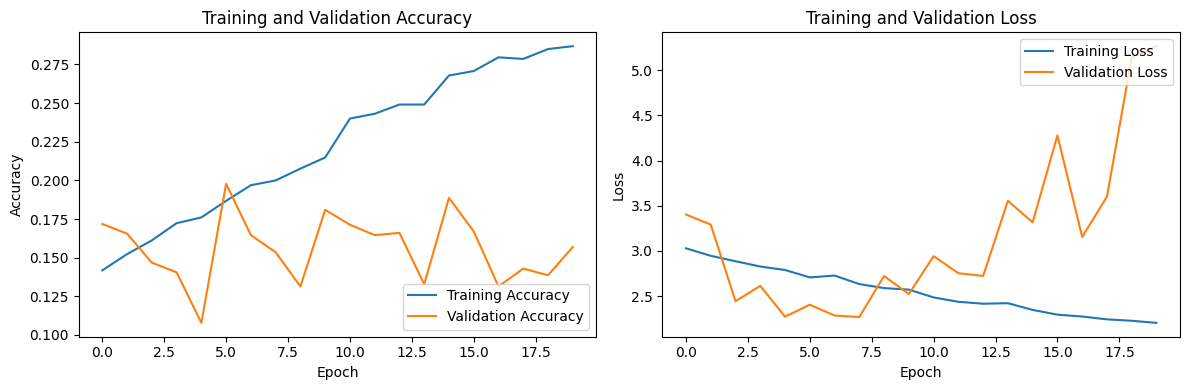

In [16]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history_v1.history['accuracy']
val_acc = history_v1.history['val_accuracy']

loss = history_v1.history['loss']

val_loss = history_v1.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [17]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.1446 - loss: 5.3334
Loss: 5.265533924102783
Accuracy: 0.15688161551952362


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics


# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

65/65 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step
              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00       307
     class 2       0.00      0.00      0.00       308
     class 3       0.00      0.00      0.00       289
     class 4       0.56      0.12      0.20       296
     class 5       0.00      0.00      0.00       285
     class 6       0.14      1.00      0.24       273
     class 7       0.53      0.05      0.09       320

    accuracy                           0.16      2078
   macro avg       0.18      0.17      0.08      2078
weighted avg       0.18      0.16      0.08      2078

Accuracy: 0.15688161693936478
Precision: 0.1801730852520346
Recall: 0.15688161693936478
F1-score: 0.07514965149517619
Log Loss: 5.243353367996026


c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

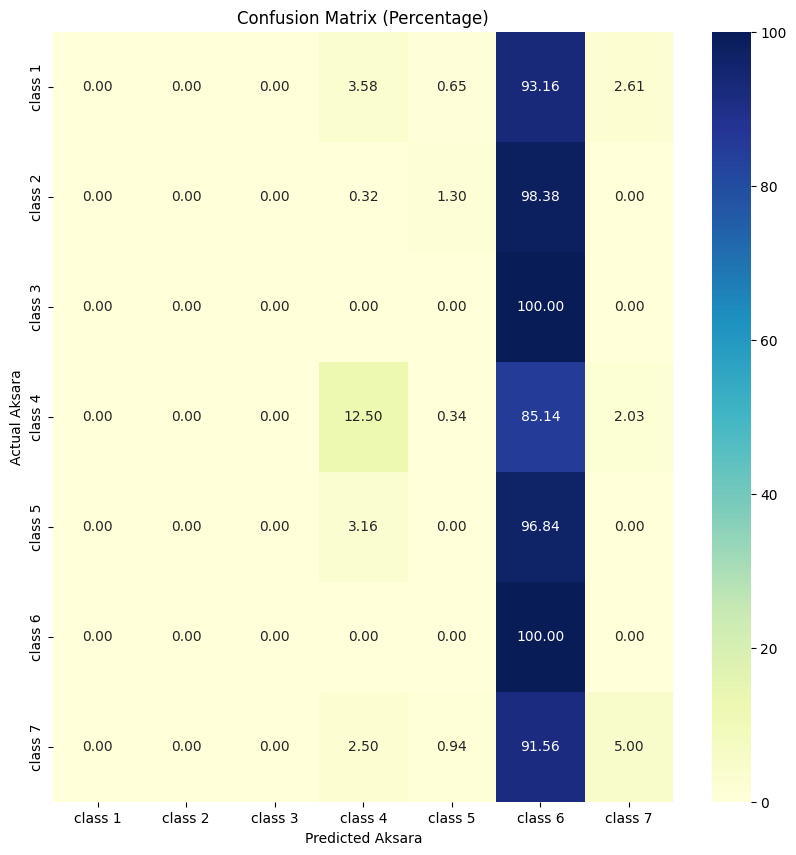

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [ ]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = model.predict(X_test)

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(8):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))
# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
# for i, color in zip(range(8), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

In [ ]:
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

# y_test_int = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_int = np.argmax(y_pred, axis=1)

# print(classification_report(y_test_int, y_pred_int))

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(10, 10))
# cm = confusion_matrix(y_test_int, y_pred_int)

# # Hitung total sampel untuk setiap kelas aktual
# total_per_class = np.sum(cm, axis=1)

# # Konversi setiap elemen dalam confusion matrix menjadi persentase
# cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# # Gunakan label langsung dari variabel Aksara
# emotions_labels = aksara_categories

# sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
# plt.xlabel("Predicted Emotions")
# plt.ylabel("Actual Emotions")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()